In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("heart_disease.xlsx", sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


## Check for missing values, outliers, and inconsistencies in the data.

### Missing values

In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
# Fill missing values in 'oldpeak' with median
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

### Outliers

In [10]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

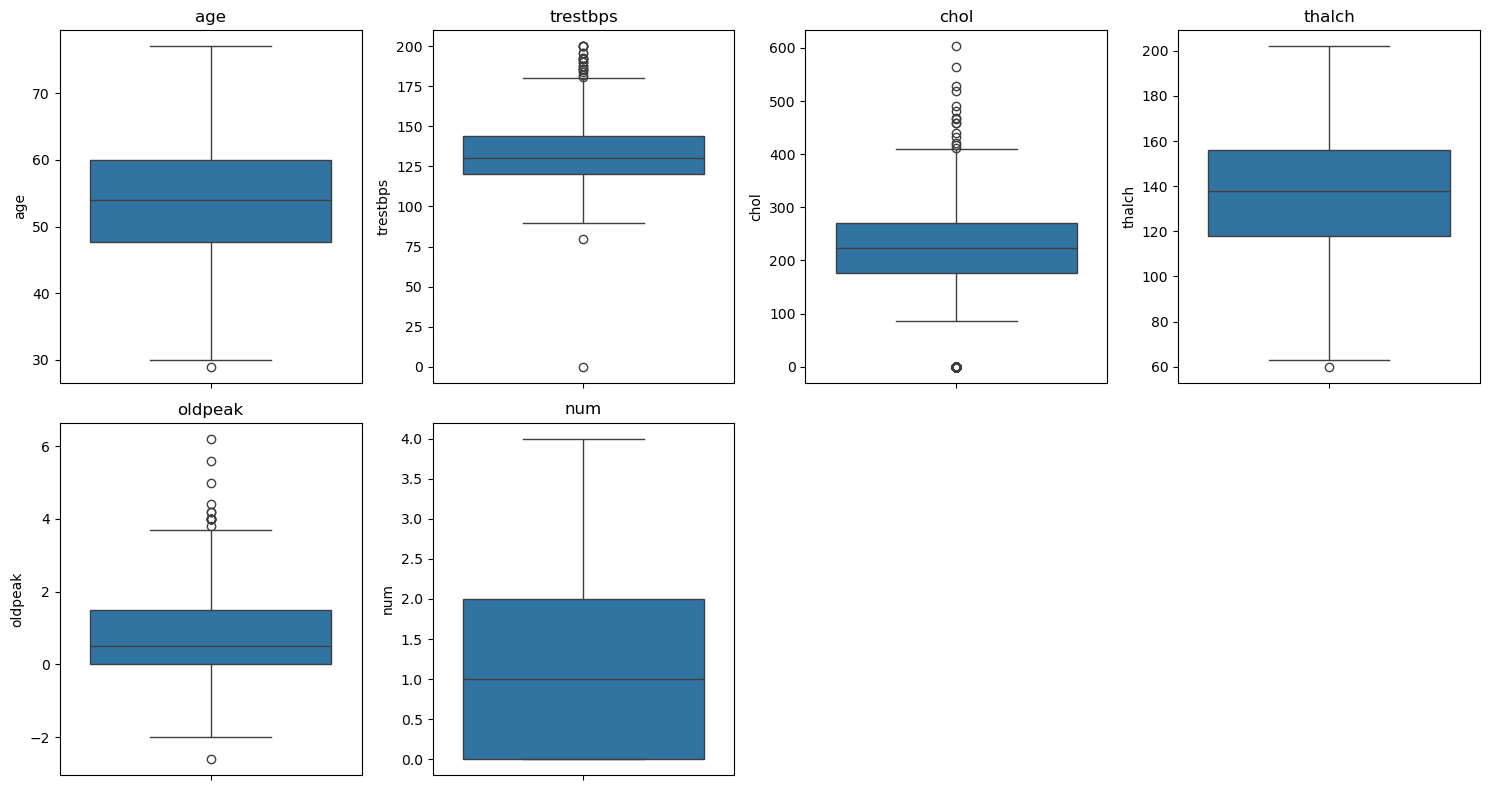

In [11]:
#Check for outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping
    df[col] = np.where(df[col] < lower_bound, lower_bound, np.where(df[col] > upper_bound, upper_bound, df[col]))

for col in num_cols:
    cap_outliers_iqr(df, col)

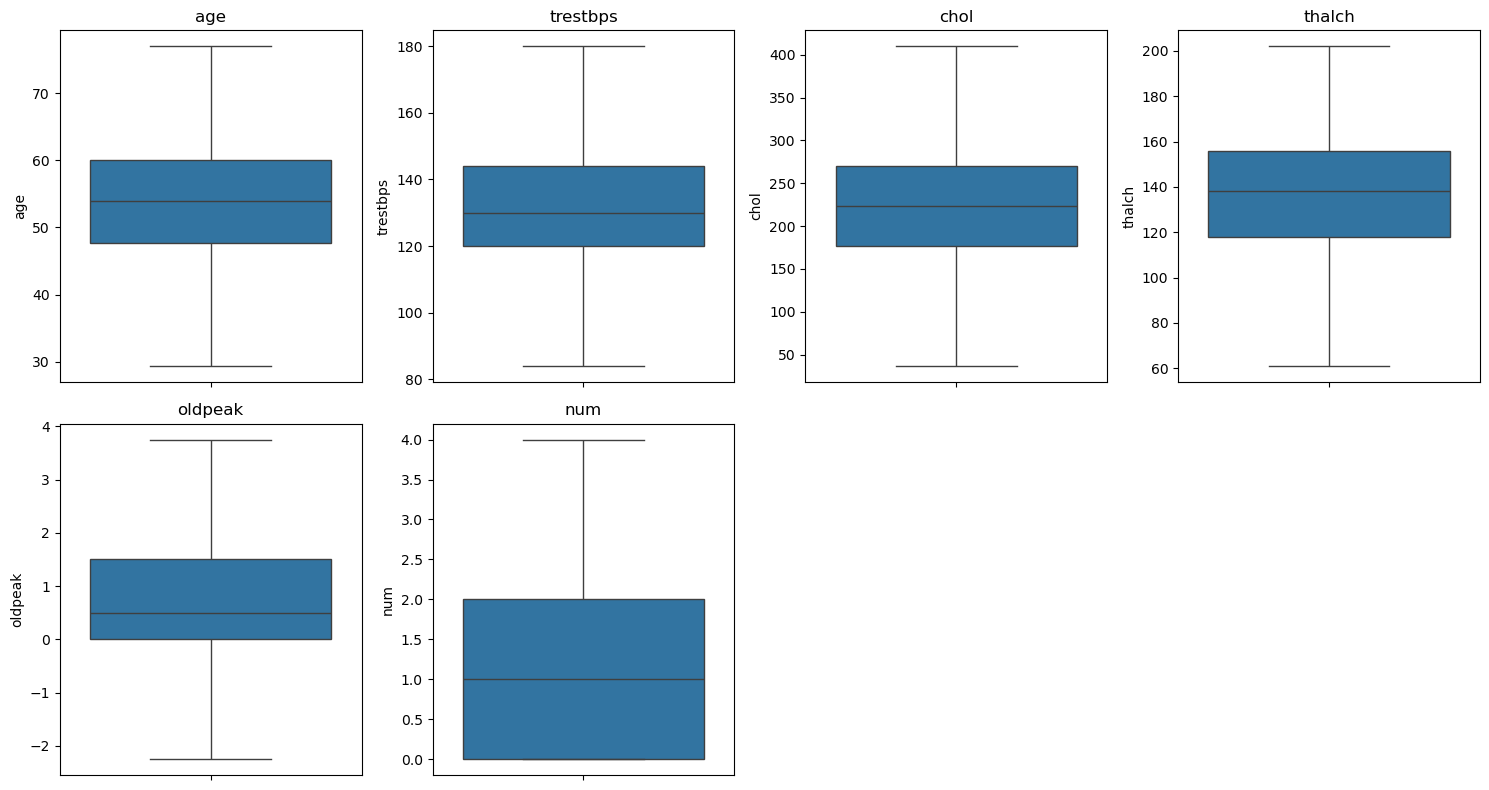

In [13]:
#Check for outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Inconsistencies in data

In [15]:
# Columns with object or boolean types
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
cat_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [16]:
# Print unique values before cleaning
for col in cat_cols:
    print(f"\nBefore cleaning - Unique values in '{col}':\n", df[col].unique())


Before cleaning - Unique values in 'sex':
 ['Male' 'Female']

Before cleaning - Unique values in 'cp':
 ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

Before cleaning - Unique values in 'fbs':
 [ True False]

Before cleaning - Unique values in 'restecg':
 ['lv hypertrophy' 'normal' 'st-t abnormality']

Before cleaning - Unique values in 'exang':
 [False True 'FALSE' 'TURE']

Before cleaning - Unique values in 'slope':
 ['downsloping' 'flat' 'upsloping']

Before cleaning - Unique values in 'thal':
 ['fixed defect' 'normal' 'reversable defect']


In [17]:
for col in cat_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower().str.strip()

In [18]:
# Print unique values after cleaning
for col in cat_cols:
    print(f"\nAfter cleaning - Unique values in '{col}':\n", df[col].unique())


After cleaning - Unique values in 'sex':
 ['male' 'female']

After cleaning - Unique values in 'cp':
 ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

After cleaning - Unique values in 'fbs':
 [ True False]

After cleaning - Unique values in 'restecg':
 ['lv hypertrophy' 'normal' 'st-t abnormality']

After cleaning - Unique values in 'exang':
 [nan 'false' 'ture']

After cleaning - Unique values in 'slope':
 ['downsloping' 'flat' 'upsloping']

After cleaning - Unique values in 'thal':
 ['fixed defect' 'normal' 'reversable defect']


## Visualize the distribution of features, including histograms, box plots, and correlation matrices.

### Histograms – For understanding feature distributions

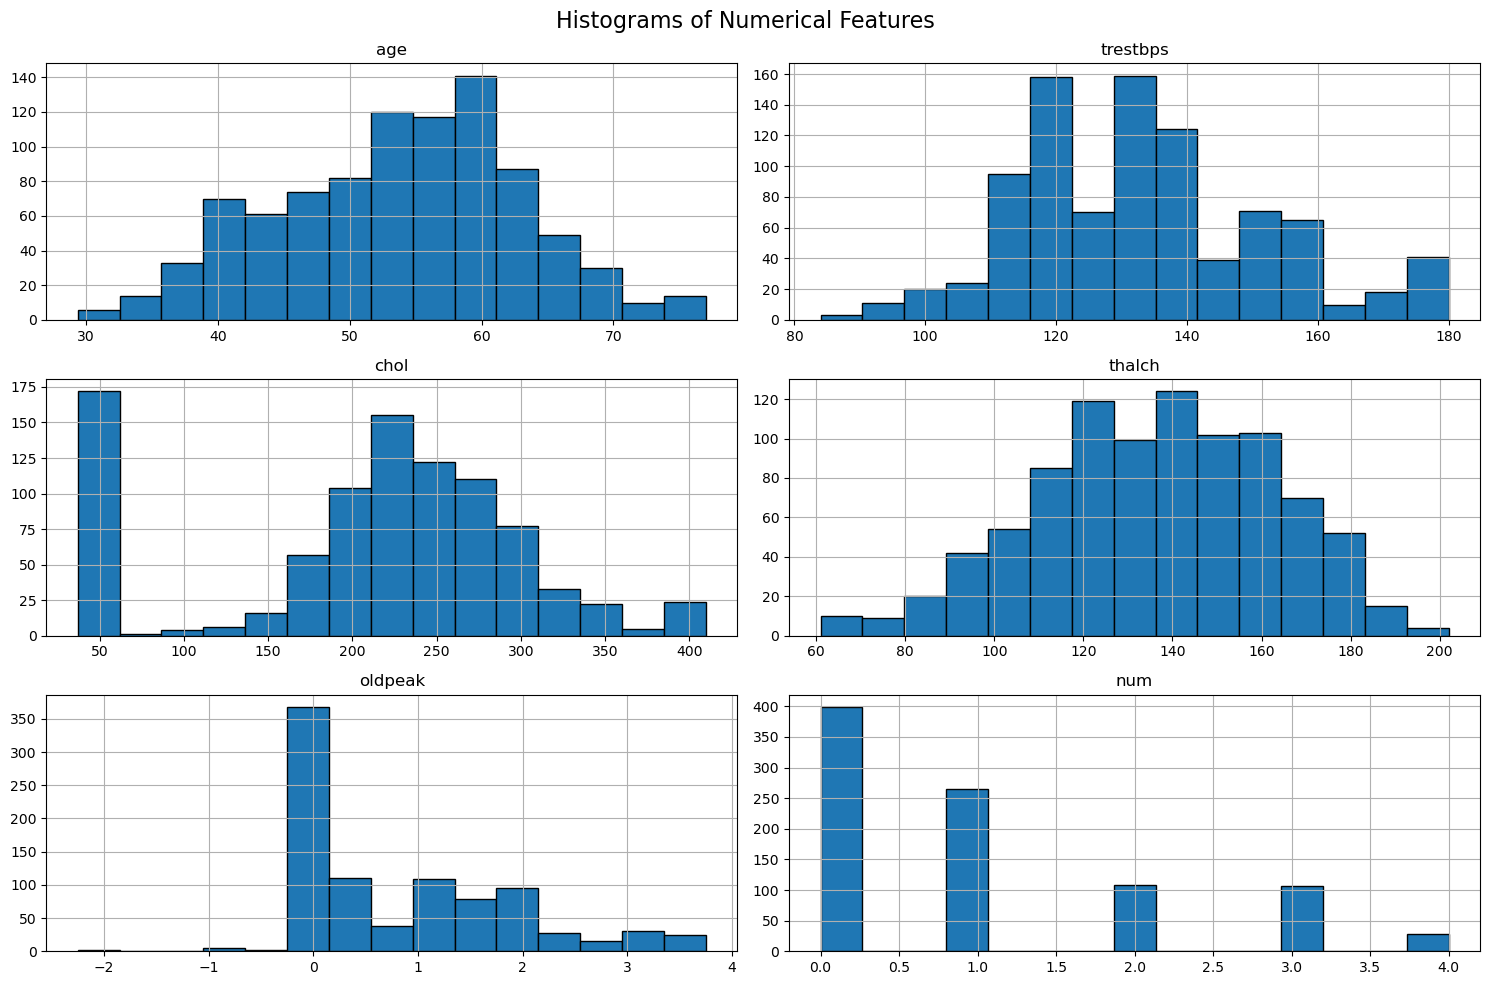

In [21]:
# Plot histograms
df[num_cols].hist(figsize=(15, 10), bins=15, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

### Box Plots – For spotting outliers and spread

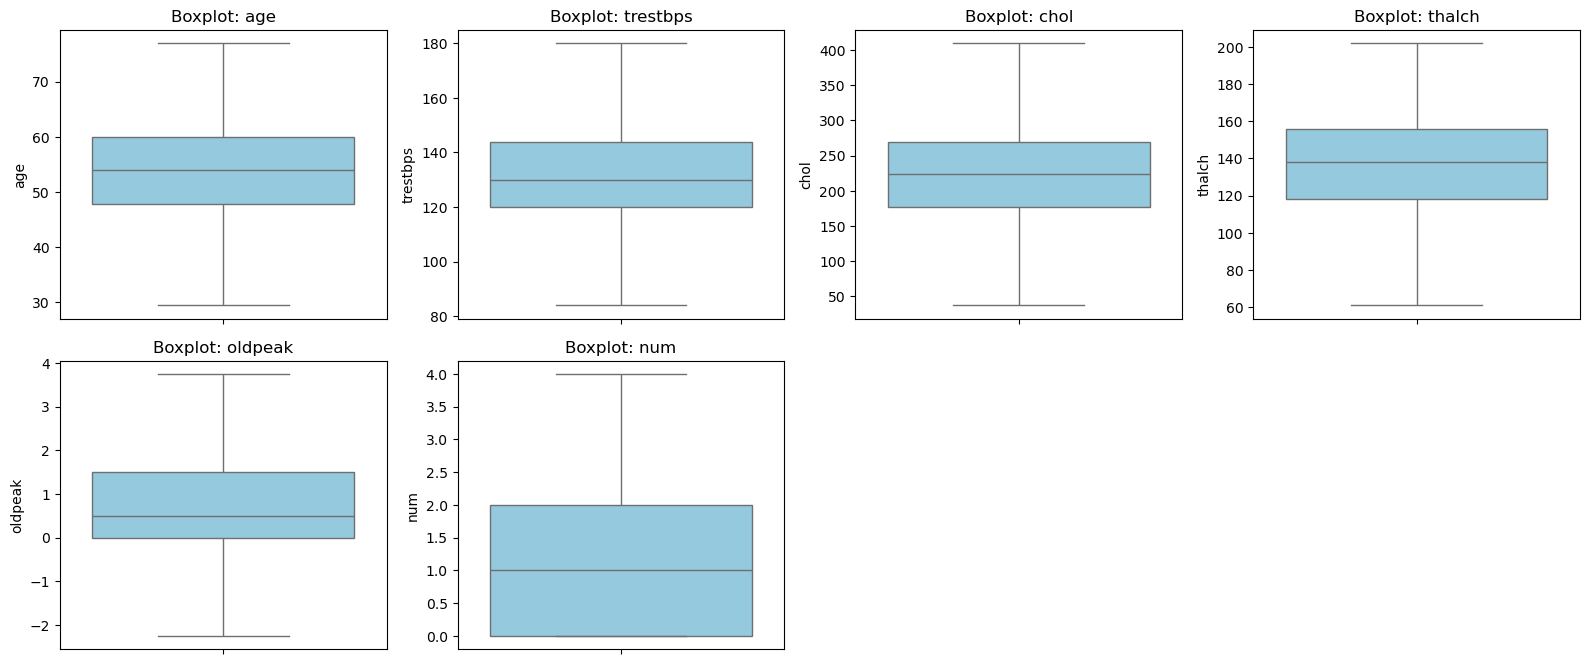

In [23]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

### Correlation Matrix – To detect relationships between features

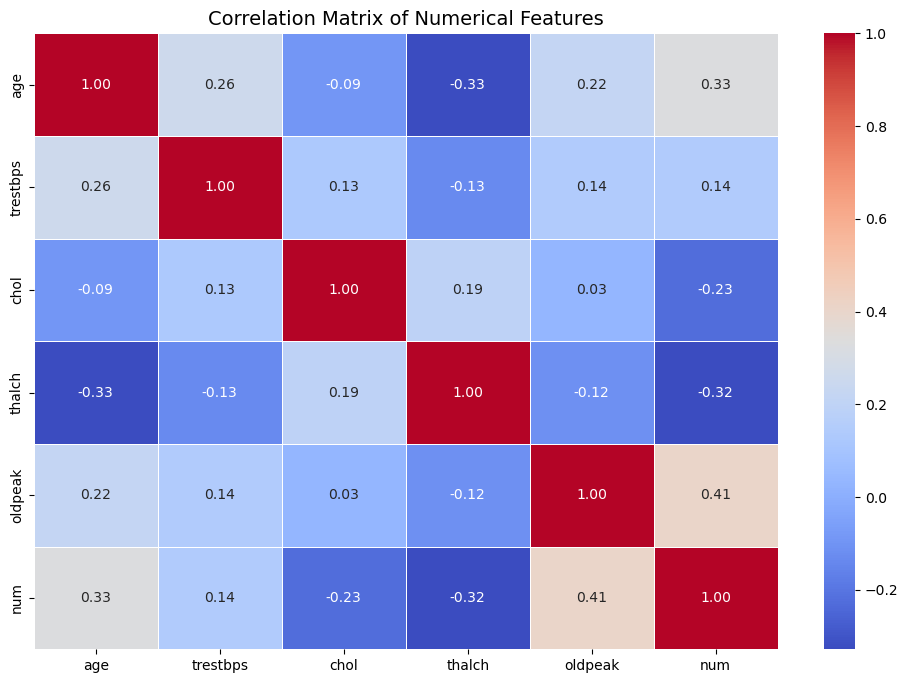

In [25]:
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()

### None of the features have strong correlation with each other (above ±0.8), so multicollinearity is not a problem for Decision Trees

# 3. Feature Engineering

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [29]:
# No need to scale features for Decision Trees.

# 4. Decision Tree Classification:

### Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [32]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,1,3,145.0,233.000,1,0,150.0,2,2.3,0,0,0.0
1,41.0,1,1,135.0,203.000,0,1,132.0,2,0.0,1,0,0.0
2,57.0,1,0,140.0,192.000,0,1,148.0,2,0.4,1,0,0.0
3,52.0,1,3,118.0,186.000,0,0,190.0,2,0.0,1,0,0.0
4,57.0,1,0,110.0,201.000,0,1,126.0,2,1.5,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,1,0,125.0,36.875,0,1,120.0,2,1.5,2,2,4.0
904,62.0,1,0,166.0,170.000,0,2,120.0,2,3.0,1,2,4.0
905,56.0,1,2,170.0,36.875,0,0,123.0,2,2.5,0,1,4.0
906,56.0,1,2,144.0,208.000,1,2,105.0,1,0.5,0,0,4.0


In [33]:
from sklearn.model_selection import train_test_split

# Assuming the target column is 'num'
x = df.drop(columns='num') #Target
y = df['num'] #Features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 12)
(182, 12)
(726,)
(182,)


### Train the Decision Tree Model (Implement a Decision Tree Classification model using a library like scikit-learn.)

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
print("Unique values in target column (num):", df['num'].unique())

Unique values in target column (num): [0. 1. 2. 3. 4.]


In [73]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize

In [77]:
# Predictions
y_pred = dt_model.predict(x_test)
y_pred

array([1., 3., 1., 3., 1., 3., 2., 3., 0., 3., 0., 0., 2., 0., 1., 1., 0.,
       2., 2., 1., 0., 3., 2., 0., 0., 0., 1., 1., 3., 0., 0., 2., 1., 0.,
       2., 2., 3., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 3., 0., 1., 0.,
       0., 0., 1., 0., 4., 1., 1., 2., 1., 0., 3., 1., 0., 0., 2., 2., 0.,
       3., 4., 2., 1., 2., 0., 3., 0., 1., 0., 3., 0., 1., 1., 2., 0., 3.,
       1., 0., 1., 2., 3., 3., 1., 1., 1., 1., 0., 1., 3., 1., 3., 1., 1.,
       0., 3., 0., 0., 0., 2., 1., 4., 3., 0., 3., 0., 2., 4., 0., 2., 0.,
       0., 3., 2., 0., 0., 1., 1., 0., 1., 0., 0., 0., 4., 1., 4., 3., 3.,
       2., 2., 0., 0., 2., 3., 0., 3., 3., 1., 1., 0., 1., 0., 1., 0., 2.,
       0., 0., 2., 3., 1., 0., 0., 2., 0., 2., 1., 0., 1., 2., 4., 1., 1.,
       1., 1., 0., 1., 1., 1., 3., 0., 0., 0., 0., 2.])

In [79]:
# Metrics for multiclass classification
print("Multiclass Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

Multiclass Model Performance:
Accuracy: 0.42857142857142855
Precision (macro): 0.3016061391103018
Recall (macro): 0.2917162868577963
F1 Score (macro): 0.2944678178963893


In [81]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.64      0.69        80
         1.0       0.39      0.38      0.38        53
         2.0       0.14      0.18      0.16        22
         3.0       0.07      0.10      0.08        21
         4.0       0.14      0.17      0.15         6

    accuracy                           0.43       182
   macro avg       0.30      0.29      0.29       182
weighted avg       0.48      0.43      0.45       182



In [83]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[51 14  5  8  2]
 [ 9 20 10 12  2]
 [ 4  8  4  5  1]
 [ 2  8  8  2  1]
 [ 1  1  1  2  1]]


In [87]:
# ROC-AUC for multiclass
# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_score = dt_model.predict_proba(x_test)

In [89]:
roc_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
print("ROC-AUC Score (macro):", roc_auc)

ROC-AUC Score (macro): 0.5709615839226616


# 5. Hyperparameter Tuning:

- max_depth – maximum depth of the tree
- min_samples_split – minimum samples to split a node
- criterion – function to measure the quality of a split (gini or entropy)

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    #3-Forces the tree to stay small helps prevent overfitting,
    #5-A common balance for simpler classification trees
    # 10 - Deeper tree, captures more complexity
    # 15 - Deep tree, tests model performance at high complexity
    # None- No limit – lets tree grow until all leaves are pure or too small
    # 2	Default – splits even for smallest nodes (risk of overfitting)
    # 5	Requires 5 samples to split – more conservative
    # 10	Very cautious – reduces tree complexity
    'max_depth': [3, 5, 10, 15, None],  
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [99]:
# Initialize base model
dt = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit on training data
grid_search.fit(x_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [101]:
# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

# Best model
best_dt = grid_search.best_estimator_

# Predict using best model
y_best_pred = best_dt.predict(x_test)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score

print("\nOptimized Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_best_pred))
print("Classification Report:\n", classification_report(y_test, y_best_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}

Optimized Model Performance:
Accuracy: 0.521978021978022
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.75      0.76        80
         1.0       0.40      0.53      0.46        53
         2.0       0.27      0.27      0.27        22
         3.0       0.08      0.05      0.06        21
         4.0       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.31      0.32      0.31       182
weighted avg       0.50      0.52      0.51       182



# 6. Model Evaluation and Analysis

In [106]:
from sklearn.metrics import classification_report, accuracy_score

# Predict using best model
y_best_pred = best_dt.predict(x_test)

# Evaluate
print("Optimized Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_best_pred))
print("Classification Report:\n", classification_report(y_test, y_best_pred))

Optimized Decision Tree Performance:
Accuracy: 0.521978021978022
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.75      0.76        80
         1.0       0.40      0.53      0.46        53
         2.0       0.27      0.27      0.27        22
         3.0       0.08      0.05      0.06        21
         4.0       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.31      0.32      0.31       182
weighted avg       0.50      0.52      0.51       182



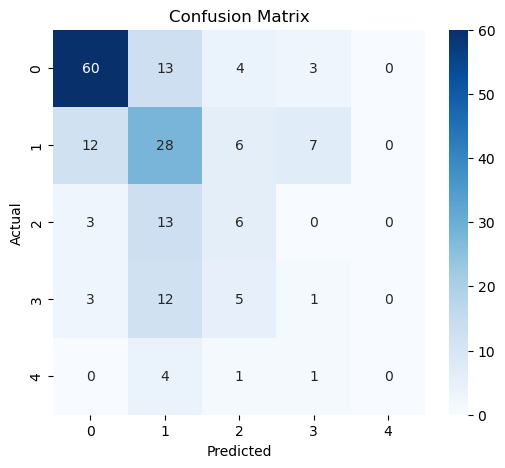

In [108]:
cm = confusion_matrix(y_test, y_best_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

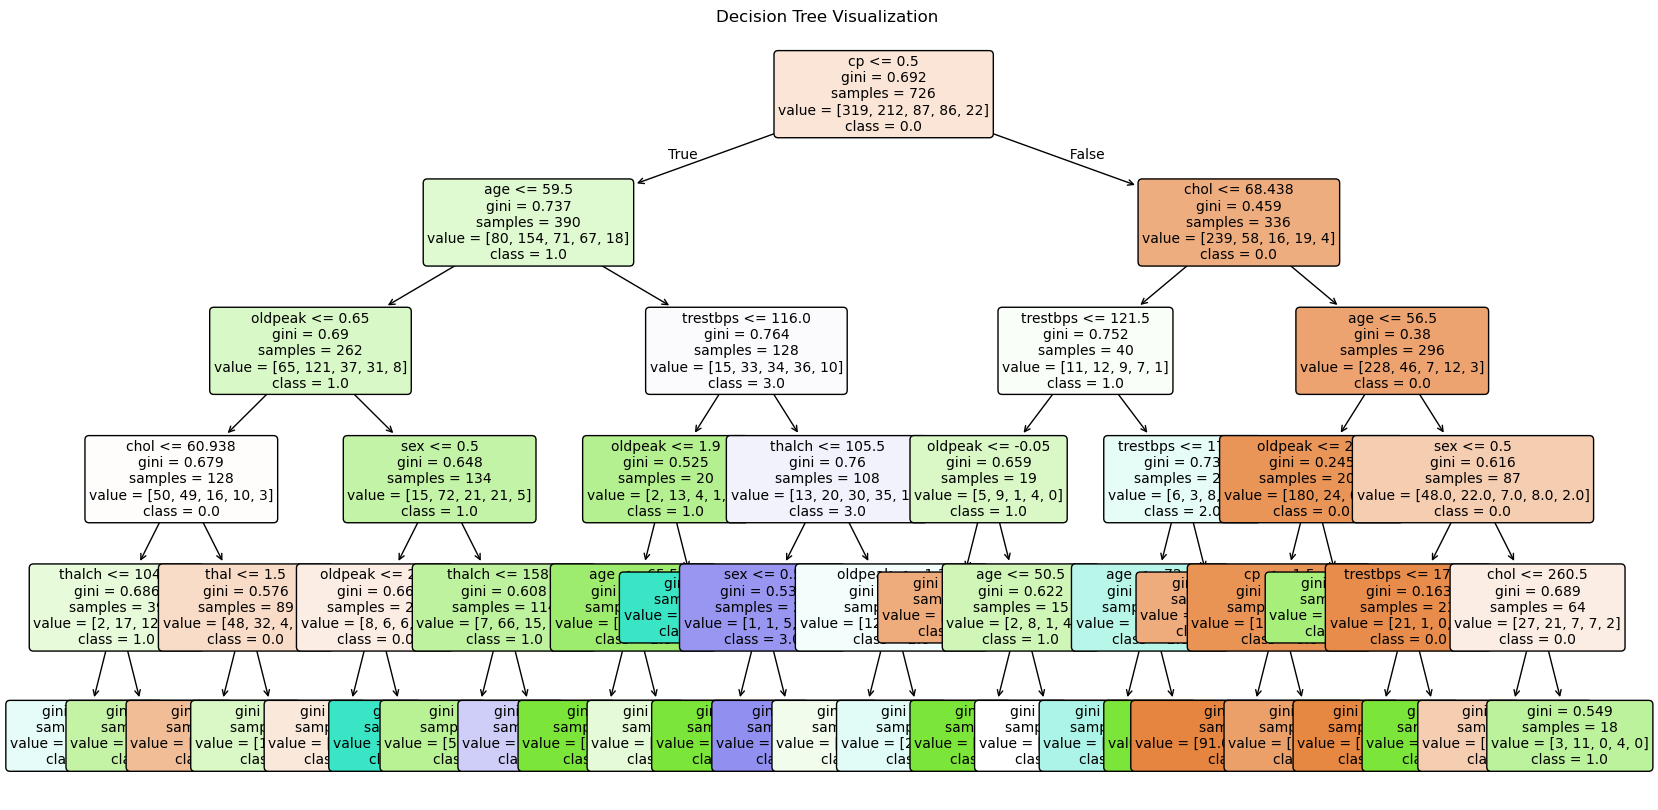

In [112]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt, 
          feature_names=x.columns, 
          class_names=[str(cls) for cls in best_dt.classes_],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

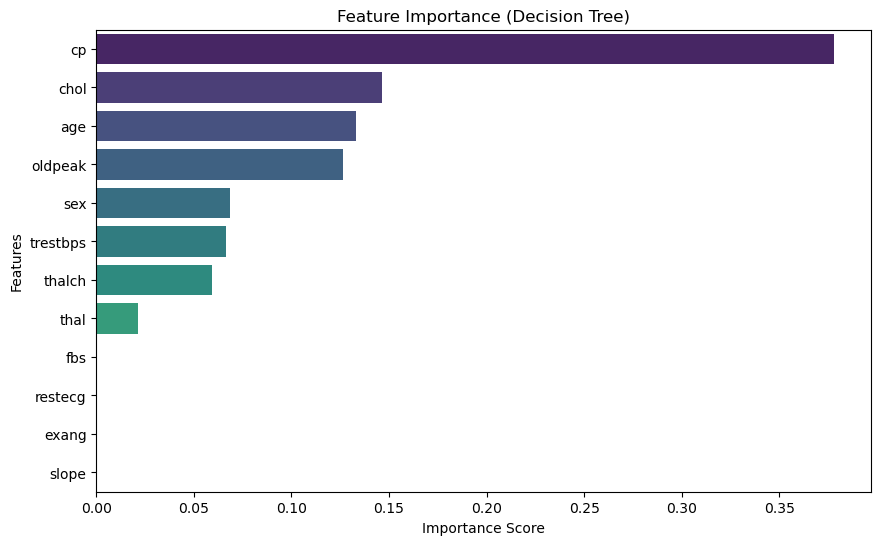

In [116]:
import pandas as pd
import numpy as np

# Feature importance
importances = best_dt.feature_importances_
feat_importance = pd.Series(importances, index=x.columns)
feat_importance = feat_importance.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
- Hyperparameters: max_depth - Prevents overfitting; limits tree complexity, min_samples_split - Higher values = simpler tree, min_samples_leaf - Prevents small, noisy leaves, max_leaf_nodes - max_leaf_nodes, criterion - Affects how splits are made, splitter - Impacts tree construction behavior.
  
2. What is the difference between the Label encoding and One-hot encoding?
- Label encoding converts categorical values into numeric labels (e.g., Red --> 0, Blue --> 1). It is simple and compact but can unintentionally introduce an order between categories.
- One-hot encoding, on the other hand, creates a new binary column for each category, avoiding any ordinal relationship (e.g., Red --> [1, 0, 0], Blue --> [0, 1, 0]). It increases dimensionality but preserves the neutrality between categories.
